In [5]:
import json
import requests as req
import pandas as pd
import random
import matplotlib.pyplot as plt
import datetime
from citipy import citipy

In [6]:
# get current date and time to display weather as of now
now = datetime.datetime.now()
today = now.strftime("%Y-%m-%d %H:%M")
print(today)

2018-04-09 14:59


In [7]:
# openweather api key
api_key = "7a208847c94ef1bbc677aa655728777e"
url = "http://api.openweathermap.org/data/2.5/box/city?"

In [8]:
# create empty list
cities = []
lat = []
lng = []
temps = []
humidity = []
clouds = []
wind_speeds = []

# create empty df
cities_df = pd.DataFrame(columns={})

In [9]:
# set coordinates for box range. Here I set coordinates to all possible cities 
input_coordinates = "-180,-90,180,90,10"

query_url = url + "&appid=" + api_key + "&bbox=" + input_coordinates
# dump all cities from range into ONE response
weather_response = req.get(query_url).json()

In [10]:
# set counter to 500 to pull 500 cities from response. All cities are pulled from one response
count = 0
while count < 500:
    # generate random number to pull random city from list of ~10,000
    index_num = random.randint(0, len(weather_response["list"]))
    # pull name from response json, append to list
    cities.append(weather_response["list"][index_num]["name"])
    # pull latitude from response json, append to list
    lat.append(weather_response["list"][index_num]["coord"]["Lat"])
    # pull longitude from response json, append to list
    lng.append(weather_response["list"][index_num]["coord"]["Lon"])
    # pull temp from response json, append to list
    temps.append(weather_response["list"][index_num]["main"]["temp"])
    # pull humidity from response json, append to list
    humidity.append(weather_response["list"][index_num]["main"]["humidity"])
    # pull clouds from response json, append to list
    clouds.append(weather_response["list"][index_num]["clouds"]["today"])
    # pull wind speed from response json, append to list
    wind_speeds.append(weather_response["list"][index_num]["wind"]["speed"])
    count += 1

# append data for 500 cities to dataframe
cities_df["City"] = cities
cities_df["Latitude"] = lat
cities_df["Longitude"] = lng
# I pull temp in celsius because pulling in imperial seems to break down the api (temps in fahrenheit have been inaccurate)
cities_df["Temperature (C)"] = temps
cities_df["Cloud Cover"] = clouds
cities_df["Humidity"] = humidity
cities_df["Wind Speed (MPH)"] = wind_speeds

In [11]:
# use citipy to get country code for each city in dataframe
country_codes = []

for x in range(len(cities_df)):
    city = citipy.nearest_city(cities_df["Latitude"][x], cities_df["Longitude"][x])
    country_codes.append(city.country_code.upper())

cities_df["Country"] = country_codes

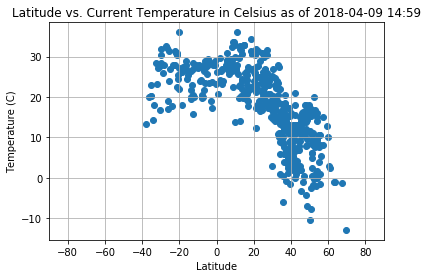

In [12]:
# plot temperature
plt.scatter(cities_df["Latitude"], cities_df["Temperature (C)"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Latitude vs. Current Temperature in Celsius as of " + today)
plt.grid()
plt.xlim(-90, 90)
plt.savefig("temperature.png")

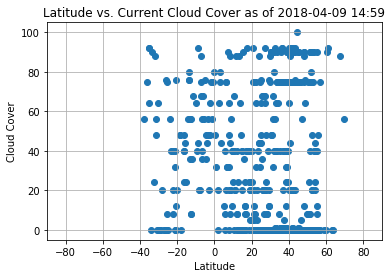

In [13]:
# plot cloud cover
plt.scatter(cities_df["Latitude"], cities_df["Cloud Cover"])
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover")
plt.title("Latitude vs. Current Cloud Cover as of " + today)
plt.grid()
plt.xlim(-90, 90)
plt.savefig("cloud_cover.png")

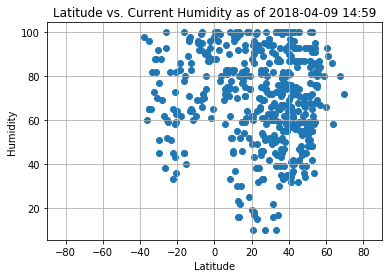

In [14]:
# plot humidity
plt.scatter(cities_df["Latitude"], cities_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Current Humidity as of " + today)
plt.grid()
plt.xlim(-90, 90)
plt.savefig("humidity.png")

In [ ]:
# plot wind speed
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed (MPH)"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Latitude vs. Current Wind Speed as of " + today)
plt.grid()
plt.xlim(-90,)

In [ ]:
# export dataframe to csv
cities_df.to_csv("city_weather_data.csv")